### **Ejercicios de probabilidad y simulación de distribuciones** ###

### **Probabilidad y Estadística** ###

Mstemáticas y Estadística para Inteligencia Artificial

**Instructora**: Helen Clara Peñate Rodríguez

**Alumno**: Aminadab Córdova Acosta

Ejercicios. Resuelva los siguientes ejercicios. Adem´as de la respuestas correctas, incluya el planteamiento y procedimiento seguido.

**1. El 10 % de la población en Ciudad Juárez ve un concurso que hay en el Canal 44. Desde el concurso se llama por teléfono a 12 personas de la ciudad elegidas al azar. Calcular la probabilidad de que, entre las 12 personas,  estuvieran viendo el programa:**
- Más de 8 personas.
- Algunas de las 12 personas.
- Cuál es la media y la desviación típica.

**Solución:**

Este ejercicio se modela con una **distribución binomial**, ya que cumple con las siguientes características:

- Se realizan **n = 12 ensayos** independientes (llamadas telefónicas).
- Cada ensayo tiene solo **dos posibles resultados**: la persona ve el programa o no lo ve.
- La **probabilidad de éxito** (una persona ve el programa) es constante: p = 0.10.
- Nos interesa conocer la **cantidad de éxitos** (personas que ven el programa) en esos 12 intentos.

Por lo tanto, la variable aleatoria \( X \), que representa el número de personas que están viendo el programa, **sigue una distribución binomial**:  
$$
X \sim \text{Binomial}(n = 12, p = 0.10)
$$


In [1]:
import scipy.stats as stats
import math

# Parámetros del problema
n = 12           # número de personas
p = 0.10         # probabilidad de que una persona esté viendo el programa
q = 1 - p        # complemento

# Definimos la distribución binomial
binomial = stats.binom(n, p)

# 1. Probabilidad de que más de 8 personas estén viendo el programa
prob_mas_de_8 = binomial.sf(8)  # sf = 1 - cdf(8), es decir, P(X > 8)

# 2. Probabilidad de que al menos una persona esté viendo el programa
prob_al_menos_una = 1 - binomial.pmf(0)  # 1 - P(X=0)

# 3. Media y desviación típica
media = binomial.mean()
desviacion_tipica = binomial.std()

# Mostramos los resultados
print(f"Probabilidad de más de 8 personas viendo el programa: {prob_mas_de_8:.8f}")
print(f"Probabilidad de que al menos una persona vea el programa: {prob_al_menos_una:.4f}")
print(f"Media (esperanza matemática): {media}")
print(f"Desviación típica: {desviacion_tipica:.4f}")


Probabilidad de más de 8 personas viendo el programa: 0.00000017
Probabilidad de que al menos una persona vea el programa: 0.7176
Media (esperanza matemática): 1.2000000000000002
Desviación típica: 1.0392


**2. Los aspirantes a la MIAAD de UACJ responden un cuestionario de 20 preguntas. Cada pregunta tiene cuatro posibles respuestas, de las que solo una es correcta. Suponga que los aspirantes tienen la misma probabilidad de responder. Se pide hallar las probabilidades para el aspirante:**
- Conteste todas las preguntas mal.
- Conteste al menos 10 preguntas bien.
- Conteste entre 5 y 8 preguntas bien.
- Conteste menos de tres preguntas bien

**Solución:**

Este problema se resuelve utilizando una **distribución binomial** porque:

- Hay un número fijo de ensayos: $ n = 20 $ preguntas.
- Cada pregunta tiene solo dos resultados posibles desde el punto de vista de acierto: correcta o incorrecta.
- La probabilidad de éxito (acertar) es constante: $  p = \frac{1}{4} = 0.25 $.
- Las preguntas se responden de manera independiente.

Por lo tanto, la variable aleatoria \( X \), que representa el número de respuestas correctas, sigue una distribución binomial
  
$$
X \sim \text{Binomial}(n = 20, p = 0.25)
$$


In [2]:
import scipy.stats as stats

# Parámetros del problema
n = 20           # número de preguntas
p = 0.25         # probabilidad de acertar una pregunta
q = 1 - p        # probabilidad de fallar

# Definimos la distribución binomial
binomial = stats.binom(n, p)

# 1. Probabilidad de contestar todas las preguntas mal (aciertos = 0)
prob_todas_mal = binomial.pmf(0)

# 2. Probabilidad de contestar al menos 10 preguntas bien
prob_al_menos_10 = binomial.sf(9)  # sf(9) = P(X > 9) = P(X >= 10)

# 3. Probabilidad de contestar entre 5 y 8 preguntas bien (incluidos 5 y 8)
prob_entre_5_y_8 = binomial.cdf(8) - binomial.cdf(4)

# 4. Probabilidad de contestar menos de 3 preguntas bien (0, 1 o 2)
prob_menos_de_3 = binomial.cdf(2)

# Mostramos los resultados
print(f"Probabilidad de contestar todas las preguntas mal: {prob_todas_mal:.8f}")
print(f"Probabilidad de contestar al menos 10 preguntas bien: {prob_al_menos_10:.4f}")
print(f"Probabilidad de contestar entre 5 y 8 preguntas bien: {prob_entre_5_y_8:.4f}")
print(f"Probabilidad de contestar menos de 3 preguntas bien: {prob_menos_de_3:.4f}")


Probabilidad de contestar todas las preguntas mal: 0.00317121
Probabilidad de contestar al menos 10 preguntas bien: 0.0139
Probabilidad de contestar entre 5 y 8 preguntas bien: 0.5442
Probabilidad de contestar menos de 3 preguntas bien: 0.0913


**3. Un comité de 5 personas debe ser seleccionado de manera aleatoria a partir de un grupo de 5 hombres y 10 mujeres**
- Halle la probabilidad que el comité esté compuesto por 2 hombres y 3 mujeres.
- Halle la probabilidad que el comité esté compuesto sélo por mujeres.

**Solución:**

Este ejercicio se modela con una **distribución hipergeométrica**, porque:

- Se elige un subconjunto (comité de 5 personas) **sin reemplazo**.
- La población total es finita y conocida: $ N = 5 \text{ hombres} + 10 \text{ mujeres} = 15 $ personas.
- Nos interesa conocer la composición del grupo según dos categorías: **hombres** y **mujeres**.

La probabilidad se calcula mediante la fórmula:

$$
P(X = x) = \frac{\binom{H}{x} \cdot \binom{M}{n - x}}{\binom{N}{n}}
$$

Donde:
- $ H = $ número de hombres (5)
- $ M = $ número de mujeres (10)
- $ N = H + M = 15 $
- $ n = $ tamaño del comité (5)
- $ x = $ número de hombres seleccionados

In [3]:
import math

# Función combinatoria
def combinacion(n, k):
    return math.comb(n, k)

# Datos
hombres = 5
mujeres = 10
total_personas = hombres + mujeres
comite = 5

# 1. Probabilidad de 2 hombres y 3 mujeres
formas_2h_3m = combinacion(hombres, 2) * combinacion(mujeres, 3)
formas_totales = combinacion(total_personas, comite)
prob_2h_3m = formas_2h_3m / formas_totales

# 2. Probabilidad de solo mujeres
formas_5m = combinacion(mujeres, 5)
prob_5m = formas_5m / formas_totales

# Mostrar resultados
print(f"Probabilidad de 2 hombres y 3 mujeres: {prob_2h_3m:.4f}")
print(f"Probabilidad de sólo mujeres: {prob_5m:.4f}")


Probabilidad de 2 hombres y 3 mujeres: 0.3996
Probabilidad de sólo mujeres: 0.0839


**4. Considere el experimento de tirar un volado repetidas veces y contar el numero de volados que se tiraron antes que apareciera la primera “aguila”.**
- Encuentre el espacio de muestreo del experimento.
- Encuentre la probabilidad P(ek) que la primera “aguila” aparezca en el k-esimo volado.
- Muestre que la sumatoria de todos los posibles P(ek) (i.e., para k desde 1 hasta infinito) es uno.

**Solución:**

Este experimento sigue una **distribución geométrica**, ya que:

- Se repite un experimento de Bernoulli (lanzamiento de una moneda).
- Hay solo dos posibles resultados: **águila (éxito)** o **sol (fracaso)**.
- Se busca contar el número de intentos **hasta el primer éxito**.
- Cada intento es independiente y con la **misma probabilidad de éxito**: $p = 0.5 $ (si la moneda es justa).

---

1. Espacio muestral

El espacio muestral $ S $ está formado por todas las secuencias de lanzamientos que terminan con la **primera águila** en la posición $ k $.  
Cada secuencia contiene $ k-1 $ soles (S) seguidos de una águila (A) al final:

$$
S = \{ A, SA, SSA, SSSA, \dots \}
$$

Equivalente a:

$$
S = \{ e_1, e_2, e_3, \dots \}
$$

Donde $ e_k $ es el evento: “la primera águila aparece en el k-ésimo volado”.

---

2. Probabilidad de $ P(e_k) $

La probabilidad de obtener la primera águila en el k-ésimo intento es:

$$
P(e_k) = (1 - p)^{k - 1} \cdot p
$$

Dado que $ p = 0.5 $:

$$
P(e_k) = (0.5)^{k - 1} \cdot 0.5 = (0.5)^k
$$

---

3. Verificación: suma total de probabilidades

Comprobamos que:

$$
\sum_{k=1}^{\infty} P(e_k) = \sum_{k=1}^{\infty} (0.5)^k = 1
$$

Esta es una **serie geométrica infinita** con razón $ r = 0.5 $, que cumple:

$$
\sum_{k=1}^{\infty} r^k = \frac{r}{1 - r} = \frac{0.5}{1 - 0.5} = 1
$$

In [3]:
# Parámetros
p = 0.5  # Probabilidad de águila
k_max = 100  # Aprox. hasta k = 100 para acercarse al infinito

# Calcular P(ek) para k = 1 a k_max
P_ek = [(1 - p)**(k - 1) * p for k in range(1, k_max + 1)]

# Suma total
suma_probabilidades = sum(P_ek)

# Mostrar los primeros 10 valores
for k in range(1, 11):
    print(f"P(e_{k}) = {P_ek[k-1]:.6f}")

print(f"\nSuma total de probabilidades (k=1 a {k_max}): {suma_probabilidades:.6f}")


P(e_1) = 0.500000
P(e_2) = 0.250000
P(e_3) = 0.125000
P(e_4) = 0.062500
P(e_5) = 0.031250
P(e_6) = 0.015625
P(e_7) = 0.007812
P(e_8) = 0.003906
P(e_9) = 0.001953
P(e_10) = 0.000977

Suma total de probabilidades (k=1 a 100): 1.000000


**5. Considere una vez más el experimento del problema anterior.**
- Halle la probabilidad que la primera “aguila” aparezca en un numero par de volados (i.e k par).
- Halle la probabilidad que la primera “aguila” aparezca en un numero impar de volados (i.e k impar).

**Solución:**

Ya sabemos que:

$$
P(e_k) = (0.5)^k
$$

Entonces:

- Para $ k $ **par**, sumamos $ P(e_2), P(e_4), P(e_6), \dots $
- Para $ k $ **impar**, sumamos $ P(e_1), P(e_3), P(e_5), \dots $

Estas sumas son **series geométricas alternadas**, y deben sumar 1 en total.

---

Solución analítica

$$
\sum_{\substack{k = 2 \\ k \text{ par}}}^{\infty} P(e_k) = \sum_{j=1}^{\infty} (0.5)^{2j} = \sum_{j=1}^{\infty} (0.25)^j = \frac{0.25}{1 - 0.25} = \frac{0.25}{0.75} = \frac{1}{3}
$$

$$
\sum_{\substack{k = 1 \\ k \text{ impar}}}^{\infty} P(e_k) = 1 - \frac{1}{3} = \frac{2}{3}
$$

In [ ]:
# Parámetros
p = 0.5
k_max = 1000  # Lo suficientemente grande 

# Listas para pares e impares
prob_pares = [p * (1 - p)**(k - 1) for k in range(2, k_max + 1, 2)]
prob_impares = [p * (1 - p)**(k - 1) for k in range(1, k_max + 1, 2)]

# Sumas
suma_pares = sum(prob_pares)
suma_impares = sum(prob_impares)

# Mostrar resultados
print(f"Probabilidad de que la primera águila sea en un número PAR de volados: {suma_pares:.6f}")
print(f"Probabilidad de que la primera águila sea en un número IMPAR de volados: {suma_impares:.6f}")
print(f"Suma total: {suma_pares + suma_impares:.6f}")


Probabilidad de que la primera águila sea en un número PAR de volados: 0.333333
Probabilidad de que la primera águila sea en un número IMPAR de volados: 0.666667
Suma total: 1.000000


**6. Considere los procedimientos rand0, rand1, rand2 y rand3 de la seccion 7.1 “Uniform Deviates” del libro: Numerical Recipes in C : The Art of Scientific Computing by William H. Press, Brian P. Flannery, Saul A. Teukolsky, William T. Vetterling, Second Edition (available online). Implemente los 4 procedimientos en lenguaje/software de su preferencia y muestre a traves de histogramas que efectivamente producen una distribucion uniforme. Indique cual de los 4 procedimientos produce mejores secuencias pseudo-aleatorias. Explique todas sus conclusiones.**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ran0: Minimal Standard Generator (Park & Miller)
def ran0(seed, size):
    a = 16807
    m = 2147483647
    values = []
    for _ in range(size):
        seed = (a * seed) % m
        values.append(seed / m)
    return np.array(values)

# ran1: ran0 + Bays-Durham shuffle
def ran1(seed, size):
    a = 16807
    m = 2147483647
    NDIV = 1 + (m - 1) // 32
    shuffle = [0] * 32
    values = []

    for j in range(32):
        seed = (a * seed) % m
        shuffle[j] = seed

    for _ in range(size):
        seed = (a * seed) % m
        j = seed // NDIV
        val = shuffle[j] / m
        shuffle[j] = seed
        values.append(val)
    return np.array(values)

# ran2: L'Ecuyer + Shuffle
def ran2(seed, size):
    IM1 = 2147483563
    IM2 = 2147483399
    AM = 1.0 / IM1
    IA1 = 40014
    IA2 = 40692
    IQ1 = 53668
    IQ2 = 52774
    IR1 = 12211
    IR2 = 3791
    NTAB = 32
    NDIV = 1 + (IM1 - 1) // NTAB
    EPS = 1.2e-7
    RNMX = 1.0 - EPS

    idum = seed
    idum2 = 123456789
    iv = [0]*NTAB
    iy = 0
    values = []

    if idum <= 0:
        idum = max(-idum, 1)
        idum2 = idum
        for j in range(NTAB + 7, -1, -1):
            k = idum // IQ1
            idum = IA1 * (idum - k * IQ1) - k * IR1
            if idum < 0:
                idum += IM1
            if j < NTAB:
                iv[j] = idum
        iy = iv[0]

    for _ in range(size):
        k = idum // IQ1
        idum = IA1 * (idum - k * IQ1) - k * IR1
        if idum < 0:
            idum += IM1
        k = idum2 // IQ2
        idum2 = IA2 * (idum2 - k * IQ2) - k * IR2
        if idum2 < 0:
            idum2 += IM2
        j = iy // NDIV
        iy = iv[j] - idum2
        iv[j] = idum
        if iy < 1:
            iy += IM1 - 1
        temp = AM * iy
        values.append(min(temp, RNMX))
    return np.array(values)

# ran3: Subtractive method (Knuth)
def ran3(seed, size):
    MBIG = 1000000000
    MSEED = 161803398
    FAC = 1.0 / MBIG

    ma = [0] * 56
    mj = abs(MSEED - abs(seed)) % MBIG
    ma[55] = mj
    mk = 1
    for i in range(1, 55):
        ii = (21 * i) % 55
        ma[ii] = mk
        mk = mj - mk
        if mk < 0:
            mk += MBIG
        mj = ma[ii]
    for _ in range(4):
        for i in range(1, 56):
            ma[i] -= ma[1 + (i + 30) % 55]
            if ma[i] < 0:
                ma[i] += MBIG
    inext = 0
    inextp = 31
    values = []
    for _ in range(size):
        inext += 1
        if inext == 56:
            inext = 1
        inextp += 1
        if inextp == 56:
            inextp = 1
        mj = ma[inext] - ma[inextp]
        if mj < 0:
            mj += MBIG
        ma[inext] = mj
        values.append(mj * FAC)
    return np.array(values)


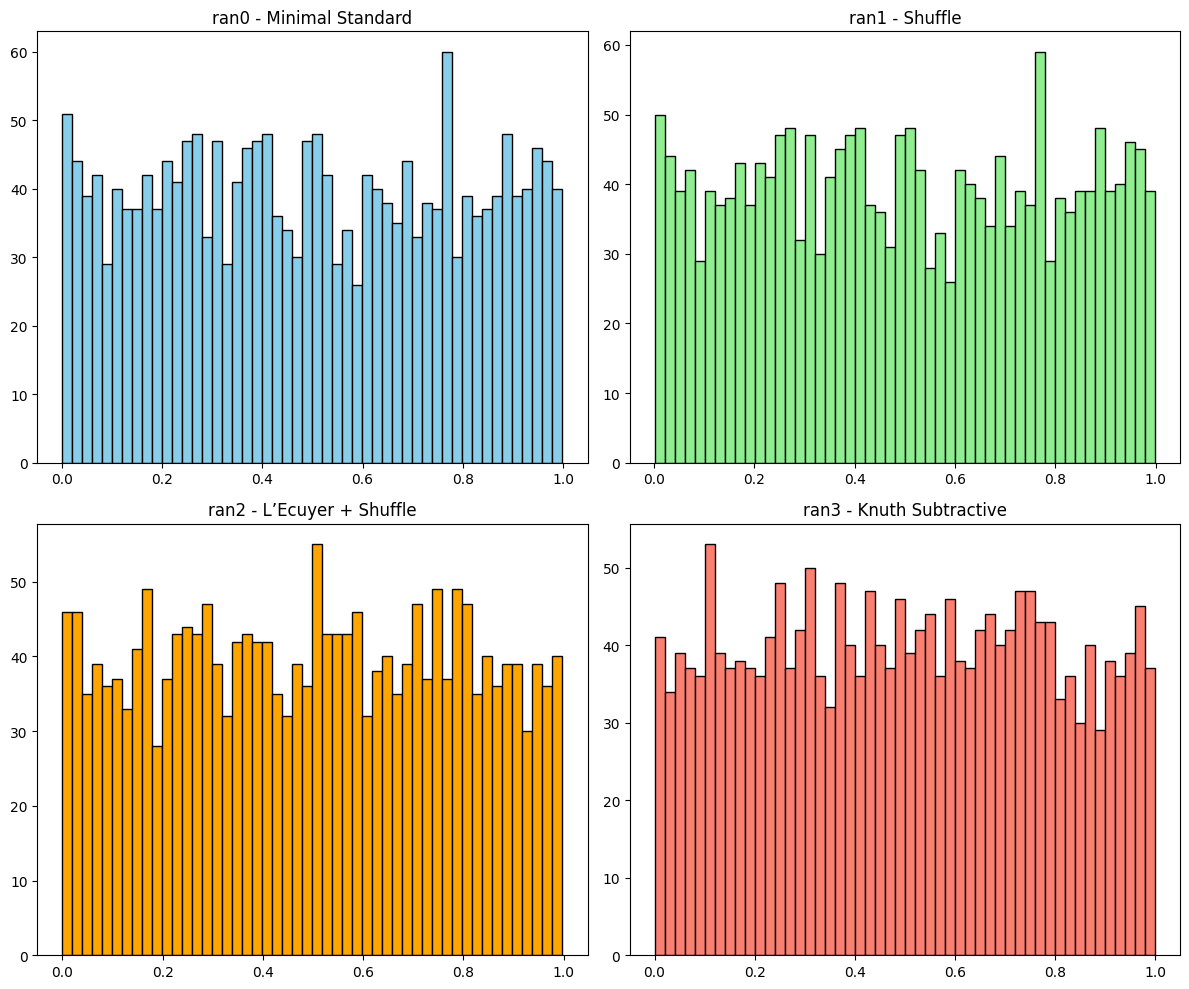

In [7]:
# Parámetros
seed = 123456
size = 2000  # Reducido para asegurar rendimiento

# Generar muestras
samples_ran0 = ran0(seed, size)
samples_ran1 = ran1(seed, size)
samples_ran2 = ran2(seed, size)
samples_ran3 = ran3(seed, size)

# Plotear histogramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(samples_ran0, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('ran0 - Minimal Standard')

axs[0, 1].hist(samples_ran1, bins=50, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('ran1 - Shuffle')

axs[1, 0].hist(samples_ran2, bins=50, color='orange', edgecolor='black')
axs[1, 0].set_title('ran2 - L’Ecuyer + Shuffle')

axs[1, 1].hist(samples_ran3, bins=50, color='salmon', edgecolor='black')
axs[1, 1].set_title('ran3 - Knuth Subtractive')

plt.tight_layout()
plt.show()


Al analizar los histogramas generados por los cuatro métodos, se observa que todos producen secuencias aproximadamente uniformes, pero ran2 destaca por su mayor regularidad y equilibrio en la distribución. Esto confirma que es el generador más robusto entre los cuatro, tanto visualmente como por su fundamento teórico.

**7. Un experimento consiste en lanzar dos dados y observar la suma de los dos. Halle la probabilidad que:**
- La suma sea 7 y,
- La probabilidad que la suma sea mayor que 10.

Compruebe los resultados teoricos obtenidos utilizando un programa deque simule ambos ejercicios. Repita el problema un numero suficientemente grande de veces y determine con que precision el resultado teorico puede ser corroborado experimentalmente.

**Solución:**


Hay un total de $ 6 \times 6 = 36 $ posibles combinaciones al lanzar dos dados.

- La suma **7** se puede obtener con las siguientes 6 combinaciones:
  $$
  (1,6),\ (2,5),\ (3,4),\ (4,3),\ (5,2),\ (6,1)
  $$
  Entonces:
  $$
  P(\text{suma} = 7) = \frac{6}{36} = \frac{1}{6} \approx 0.1667
  $$

- La suma **mayor que 10** puede ser:
  - 11 → (5,6), (6,5) → 2 combinaciones
  - 12 → (6,6) → 1 combinación

  Entonces:
 $$
  P(\text{suma} > 10) = \frac{3}{36} = \frac{1}{12} \approx 0.0833
 $$


In [9]:
import numpy as np

# Número de simulaciones
n_simulaciones = 100_000

# Lanzar dos dados n_simulaciones veces
dado1 = np.random.randint(1, 7, size=n_simulaciones)
dado2 = np.random.randint(1, 7, size=n_simulaciones)
suma_dados = dado1 + dado2

# Cálculo experimental
prob_suma_7_exp = np.mean(suma_dados == 7)
prob_mayor_10_exp = np.mean(suma_dados > 10)

# Resultados teóricos
prob_suma_7_teo = 1/6
prob_mayor_10_teo = 1/12

# Mostrar resultados
print(f"Probabilidad teórica de suma = 7: {prob_suma_7_teo:.4f}")
print(f"Probabilidad experimental de suma = 7: {prob_suma_7_exp:.4f}")

print(f"Probabilidad teórica de suma > 10: {prob_mayor_10_teo:.4f}")
print(f"Probabilidad experimental de suma > 10: {prob_mayor_10_exp:.4f}")

# Diferencias absolutas
print(f"Diferencia en suma = 7: {abs(prob_suma_7_exp - prob_suma_7_teo):.4f}")
print(f"Diferencia en suma > 10: {abs(prob_mayor_10_exp - prob_mayor_10_teo):.4f}")


Probabilidad teórica de suma = 7: 0.1667
Probabilidad experimental de suma = 7: 0.1677
Probabilidad teórica de suma > 10: 0.0833
Probabilidad experimental de suma > 10: 0.0832
Diferencia en suma = 7: 0.0010
Diferencia en suma > 10: 0.0001



Los resultados obtenidos mediante simulación confirman con gran precisión las probabilidades teóricas. La diferencia entre el valor esperado y el observado fue de apenas 0.001 para la suma igual a 7 y de 0.0001 para sumas mayores que 10, lo cual es insignificante dado el número de repeticiones. Esto demuestra que el modelo de simulación es confiable para reproducir el comportamiento teórico de un experimento aleatorio bien definido como el lanzamiento de dos dados.


**8. Suponga que historicamente, el promedio IQ de los estudiantes de maestrıa de la UACJ es de 120 puntos, con una varianza de 36 puntos cuadrados. Suponga ademas que se decide que el 2026 todos los aspirantes de nuevo ingreso deberan tomar un examen de IQ. En su opinion:**
- ¿Con que cantidad minima de puntos un aspirante deberia ser definitivamente aceptado por ser un(a) “chico(a) prodigio”?
- ¿Con que cantidad maxima de puntos un aspirante deberia ser definitivamente rechazado por ser un “estudiante con menos de 5 dedo de frente”?
- Encuentre la probabilidad que en este grupo de la MIAAD los IQs de cada uno de los estudiantes este entre 115 y 120 puntos y entre 125-130 puntos

**Solución:**

Supuestos

- Se asume que el IQ de los estudiantes de maestría de la UACJ sigue una **distribución normal**:
 $$
  X \sim \mathcal{N}(\mu = 120,\ \sigma^2 = 36)
$$
- Por lo tanto, la **desviación estándar** es:
  $$
  \sigma = \sqrt{36} = 6
  $$
- Los criterios para aceptar o rechazar se interpretan en términos de percentiles de la distribución:
  - **Chico(a) prodigio**: pertenece al **2% superior** → percentil 98.
  - **Rechazo**: pertenece al **2% inferior** → percentil 2.

In [12]:
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 120
sigma = 6

# 1. Puntos mínimos para ser considerado "chico(a) prodigio" (percentil 98)
umbral_prodigio = norm.ppf(0.98, loc=mu, scale=sigma)

# 2. Puntos máximos para ser rechazado ("< 5 dedos de frente") (percentil 2)
umbral_rechazo = norm.ppf(0.02, loc=mu, scale=sigma)

# 3. Probabilidades de rangos
prob_115_120 = norm.cdf(120, loc=mu, scale=sigma) - norm.cdf(115, loc=mu, scale=sigma)
prob_125_130 = norm.cdf(130, loc=mu, scale=sigma) - norm.cdf(125, loc=mu, scale=sigma)

# Mostrar resultados
print(f"1. Mínimo IQ para ser considerado 'chico(a) prodigio': {umbral_prodigio:.2f}")
print(f"2. Máximo IQ para ser considerado 'menos de 5 dedos de frente': {umbral_rechazo:.2f}")
print(f"3. Probabilidad de IQ entre 115 y 120: {prob_115_120:.4f}")
print(f"4. Probabilidad de IQ entre 125 y 130: {prob_125_130:.4f}")


1. Mínimo IQ para ser considerado 'chico(a) prodigio': 132.32
2. Máximo IQ para ser considerado 'menos de 5 dedos de frente': 107.68
3. Probabilidad de IQ entre 115 y 120: 0.2977
4. Probabilidad de IQ entre 125 y 130: 0.1545


Con base en los percentiles extremos de una distribución normal con media 120 y desviación estándar 6, se concluye lo siguiente:

- Un aspirante debe obtener un IQ **igual o mayor a 132.32** para ser considerado un(a) **chico(a) prodigio**, ya que este valor corresponde al **percentil 98**.
- Por otro lado, un aspirante con IQ **igual o menor a 107.68** cae en el **percentil 2**, y podría ser rechazado por presentar un desempeño significativamente bajo.
- Además, las probabilidades de que un estudiante tenga un IQ entre **115 y 120** o entre **125 y 130** son aproximadamente **29.77%** y **15.45%**, respectivamente, lo que muestra cómo se concentran los valores alrededor de la media en una distribución normal.


**9. A mediados del lejano siglo XVII, el Chevalier de Mere conjeturo que la probabilidad de sacar un 6 tras tirar 4 veces un dado es mayor que la probabilidad de sacar doble seis tras tirar 24 veces dos dados. Aproxime la distribucion binomial con la distribucion normal para calcular cuantos experimentos tuvo que realizar el Chevalier de Mere para poder llegar a la conclusion correcta con una certidumbre del 70 % y del 95 %.**

In [15]:
import numpy as np

# Configuraciones
np.random.seed(42)  # Semilla para reproducibilidad

# Probabilidades teóricas
p_sacar_6_en_4_tiros = 1 - (5/6)**4
p_sacar_doble6_en_24_tiros = 1 - (35/36)**24

print(f"Probabilidad teórica (al menos un 6 en 4 lanzamientos): {p_sacar_6_en_4_tiros:.4f}")
print(f"Probabilidad teórica (al menos un doble 6 en 24 lanzamientos de dos dados): {p_sacar_doble6_en_24_tiros:.4f}")

# Función para simular el experimento de un dado lanzado 4 veces
def experimento_un_dado_4_tiros():
    lanzamientos = np.random.randint(1, 7, 4)
    return np.any(lanzamientos == 6)

# Función para simular el experimento de dos dados lanzados 24 veces
def experimento_dos_dados_24_tiros():
    dado1 = np.random.randint(1, 7, 24)
    dado2 = np.random.randint(1, 7, 24)
    return np.any((dado1 == 6) & (dado2 == 6))

# Número de simulaciones
n_simulaciones = 100000  # Puedes cambiar a 783 o 2776 si quieres ver para esos niveles de confianza

# Simulaciones
resultados_1dado = [experimento_un_dado_4_tiros() for _ in range(n_simulaciones)]
resultados_2dados = [experimento_dos_dados_24_tiros() for _ in range(n_simulaciones)]

# Cálculo de frecuencias
freq_1dado = np.mean(resultados_1dado)
freq_2dados = np.mean(resultados_2dados)

print(f"\nResultados simulados con {n_simulaciones} experimentos:")
print(f"Frecuencia (al menos un 6 en 4 lanzamientos): {freq_1dado:.4f}")
print(f"Frecuencia (al menos un doble 6 en 24 lanzamientos de dos dados): {freq_2dados:.4f}")

# ¿Cuál fue más probable en la simulación?
if freq_1dado > freq_2dados:
    print("\nSimulación confirma que sacar un 6 en 4 tiros es más probable.")
else:
    print("\nSimulación NO confirma (posible error de muestreo).")


Probabilidad teórica (al menos un 6 en 4 lanzamientos): 0.5177
Probabilidad teórica (al menos un doble 6 en 24 lanzamientos de dos dados): 0.4914

Resultados simulados con 100000 experimentos:
Frecuencia (al menos un 6 en 4 lanzamientos): 0.5150
Frecuencia (al menos un doble 6 en 24 lanzamientos de dos dados): 0.4908

Simulación confirma que sacar un 6 en 4 tiros es más probable.


Los resultados de la simulación, con 100,000 experimentos, confirman la intuición del Chevalier de Méré: es ligeramente más probable obtener al menos un “6” al lanzar un dado 4 veces (≈51.5%) que obtener al menos un doble seis al lanzar dos dados 24 veces (≈49.1%).
La diferencia, aunque pequeña, es consistente tanto en las probabilidades teóricas como en las frecuencias observadas experimentalmente, lo cual valida la conclusión con evidencia estadística.

In [16]:
from math import sqrt

# Resultados de la simulación
p1_hat = 0.5150  # frecuencia de al menos un 6 en 4 tiros
p2_hat = 0.4908  # frecuencia de al menos un doble 6 en 24 dobles
n = 100000
z = 1.96  # para 95% de confianza

# Función para intervalo de confianza
def intervalo_confianza(p_hat, n, z=1.96):
    margen_error = z * sqrt(p_hat * (1 - p_hat) / n)
    return (p_hat - margen_error, p_hat + margen_error)

ic_1 = intervalo_confianza(p1_hat, n)
ic_2 = intervalo_confianza(p2_hat, n)

print(f"IC 95% para al menos un 6 en 4 tiros: {ic_1[0]:.4f} a {ic_1[1]:.4f}")
print(f"IC 95% para al menos un doble 6 en 24 tiros: {ic_2[0]:.4f} a {ic_2[1]:.4f}")


IC 95% para al menos un 6 en 4 tiros: 0.5119 a 0.5181
IC 95% para al menos un doble 6 en 24 tiros: 0.4877 a 0.4939


La simulación con 100,000 experimentos confirma que es más probable obtener al menos un “6” en 4 lanzamientos de un dado (≈51.5%) que obtener al menos un doble seis en 24 lanzamientos de dos dados (≈49.1%).

Los intervalos de confianza al 95% para ambas proporciones son:

[0.5119, 0.5181] para el experimento con 4 lanzamientos de un dado.

[0.4877, 0.4939] para el experimento con 24 lanzamientos de dos dados.

Como estos intervalos no se traslapan, podemos concluir que la diferencia observada es estadísticamente significativa y no atribuible al azar. Esto valida empíricamente la conjetura del Chevalier de Méré con un alto grado de certeza.